# EDA

In [2]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string
from wordcloud import WordCloud

c:\Users\Clarita\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Ingreso de datos

Generé un dataset con toda la información en conjunto y un dataset por cada plataforma ya que algunos valores numéricos no pueden ser comparados


In [3]:
df = pd.read_csv("Data\cursos.csv")
udemy= pd.read_csv("Data/udemy.csv")
edx = pd.read_csv("Data/edx.csv")
coursera = pd.read_csv("Data/coursera.csv")

In [4]:
coursera.shape

(491, 8)

In [5]:
coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               491 non-null    object 
 1   course_title     491 non-null    object 
 2   rating           478 non-null    float64
 3   num_subscribers  491 non-null    float64
 4   level            204 non-null    object 
 5   language         43 non-null     object 
 6   category         43 non-null     object 
 7   plataforma       491 non-null    object 
dtypes: float64(2), object(6)
memory usage: 30.8+ KB


In [165]:
#prof = ProfileReport(df)
#prof.to_file(output_file='profiling.html')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 3683 non-null   int64  
 1   course_title       3683 non-null   object 
 2   is_paid            3192 non-null   object 
 3   price              3192 non-null   float64
 4   num_subscribers    3683 non-null   float64
 5   level              3396 non-null   object 
 6   content_duration   3192 non-null   float64
 7   rating             2816 non-null   float64
 8   language           3235 non-null   object 
 9   category           3235 non-null   object 
 10  anio_publicacion   2338 non-null   float64
 11  ingreso_por_curso  2338 non-null   float64
 12  plataforma         3683 non-null   object 
 13  add_certificate    854 non-null    object 
 14  price_Certificate  854 non-null    float64
dtypes: float64(7), int64(1), object(7)
memory usage: 431.7+ KB


In [167]:
df.describe()

,Id,price,num_subscribers,content_duration,rating,anio_publicacion,ingreso_por_curso,price_Certificate
count,3683.000000,3192.000000,3.683000e+03,3192.000000,2816.000000,2338.000000,2.338000e+03,854.000000
mean,1844.612816,53.073308,4.630904e+04,311.238414,4.286435,2015.449957,3.166833e+05,101.642857
std,1064.901244,63.131736,7.058132e+05,576.505647,0.496110,1.195958,1.209848e+06,70.640447
min,1.000000,0.000000,0.000000e+00,0.316667,0.000000,2011.000000,0.000000e+00,5.000000
25%,921.500000,0.000000,6.540000e+02,1.500000,4.000000,2015.000000,3.100000e+03,49.000000
50%,1846.000000,30.000000,4.011000e+03,4.000000,4.400000,2016.000000,3.668750e+04,79.000000
75%,2766.500000,80.000000,2.299950e+04,672.000000,4.600000,2016.000000,1.780500e+05,149.000000
max,3687.000000,200.000000,3.200000e+07,3024.000000,5.000000,2017.000000,2.431680e+07,450.000000


In [168]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
#advert_report = sv.analyze(df)
#display the report
#advert_report.show_html('Advertising.html')

# Introducción
Voy a comenzar con un pequeño análisis sobre la distribución de las variables, tanto categóricas como numéricas. Luego realizaré un análisis más profundo correlacionando diferentes variables

## Distribución de variables categóricas

Palabras repetidas en los títulos de los cursos

In [169]:
df["course_title"]

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3678                Mathematics for Machine Learning: PCA
3679                  Object Oriented Programming in Java
3680               Математика и Python для анализа данных
3681        Hacia una práctica constructivista en el aula
3682                       A Crash Course in Data Science
Name: course_title, Length: 3683, dtype: object

In [170]:
titulos_concatenados = ' '.join(df["course_title"])
token = word_tokenize(titulos_concatenados)
a=set(stopwords.words('english')) 
#Agrego palabras para dejar fuera de la nube de palabras que no suman al análisis
palabras_extra = {'learn', 'course'}
a.update(palabras_extra)

token2 = ["".join(char for char in word if char not in string.punctuation).strip().lower() for word in token if word]
token4 = [word for word in token2 if len(word) >= 3 and word not in a]

fdist = FreqDist(token4)



In [171]:
#Frecuencia de palabras
fdist

FreqDist({'beginners': 207, 'trading': 203, 'introduction': 196, 'web': 175, 'design': 173, 'guitar': 147, 'complete': 142, 'piano': 136, 'build': 131, 'development': 123, ...})

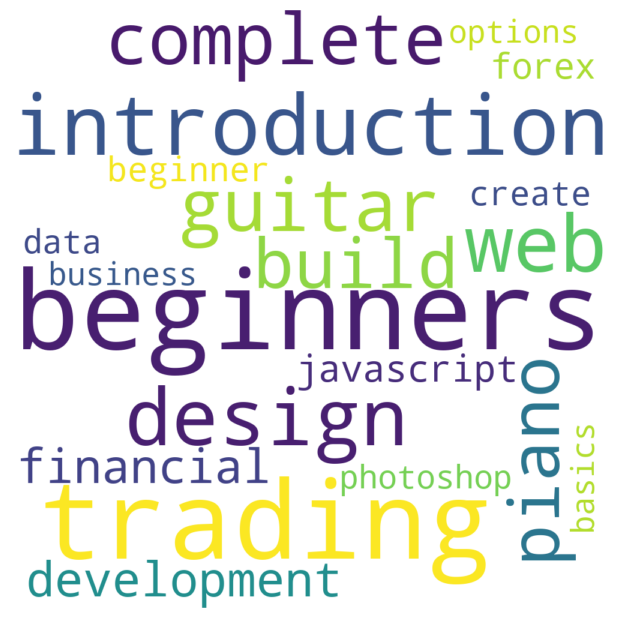

In [172]:
wordcloud = WordCloud(width=1000, height=1000, background_color='white',  max_words=20).generate_from_frequencies(fdist)

plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### ¿A qué plataforma pertenecen los cursos? (plataforma)

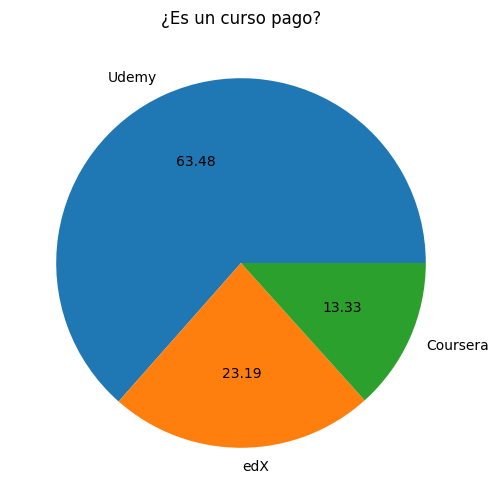

In [173]:
plot = df['plataforma'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6), title='¿Es un curso pago?')
plt.ylabel('') 
plt.show()

### ¿Es pago? (is_paid)

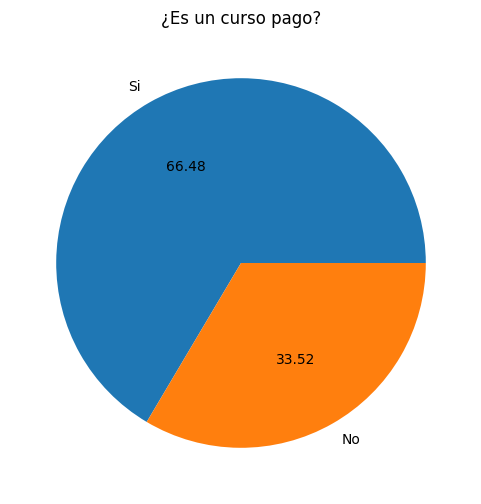

In [174]:
plot = df['is_paid'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6), title='¿Es un curso pago?')
plt.ylabel('') 
plt.show()

### Nivel del curso (level)

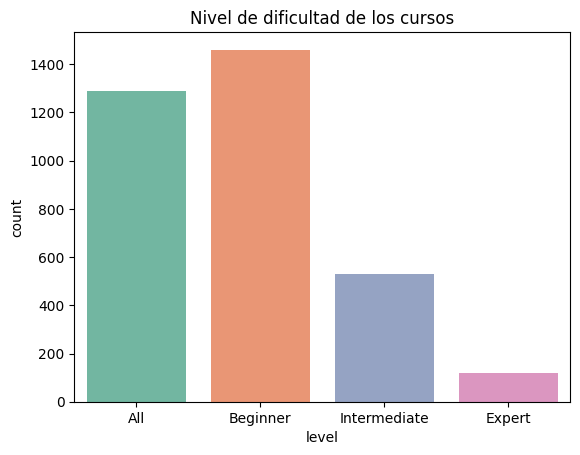

In [175]:
sns.countplot(x=df["level"], order= ["All", "Beginner", "Intermediate", "Expert"], palette="Set2")
plt.title('Nivel de dificultad de los cursos')
plt.show()

### Idioma en el que se dicta el curso (language)

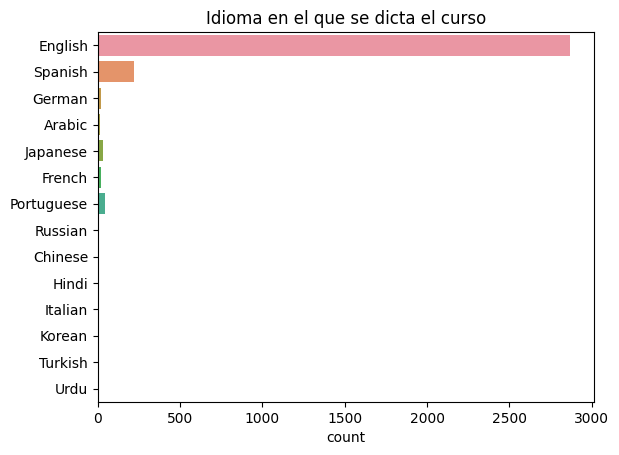

In [176]:
sns.countplot(y=df["language"])
plt.title('Idioma en el que se dicta el curso')
plt.ylabel('')
plt.show()

### Categorias en las que se dividen los cursos (category)

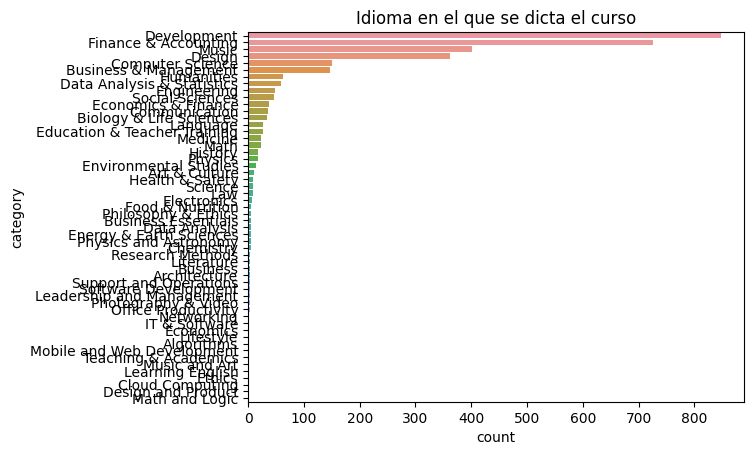

In [177]:
frecuencias = df['category'].value_counts()
sns.countplot(y=df["category"], order=frecuencias.index)
plt.title('Idioma en el que se dicta el curso')
plt.show()

Teniendo en cuenta que hay 54 categorías decidí mostrar las 20 más populares para que sea un gráfico se pueda leer facilmente

In [178]:
df["category"].nunique()

54

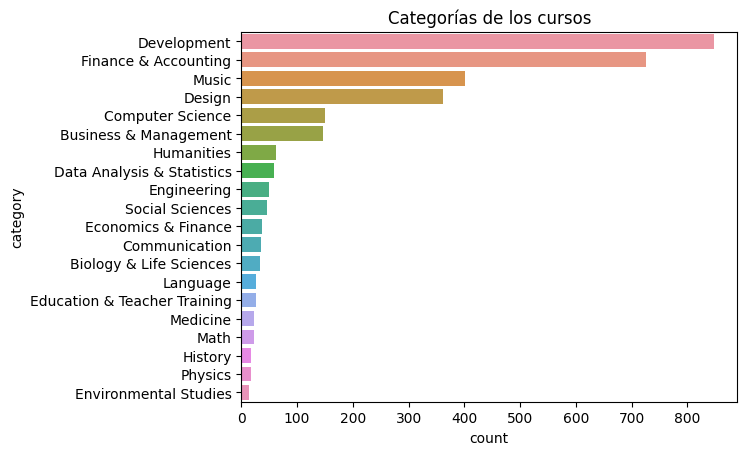

In [179]:
frecuencias = df['category'].value_counts().head(20)
sns.countplot(y='category', data=df, order=frecuencias.index )
plt.title('Categorías de los cursos')
plt.show()

De este análisis de distribución de variables categóricas, puedo inferir que la mayoría de los cursos son para principiantes o de todos los niveles. Además, casi todos se dictan en inglés y el 60% son pagos. Esto se muestra así porque, de los datos proporcionados, el 60% pertenece a la plataforma Udemy. Sin embargo, no se sigue la relación real entre la cantidad de cursos por plataforma. Por ejemplo, Coursera tiene alrededor de 7000 cursos, pero en nuestros datos solo tenemos 500. Además, no tenemos información sobre los precios de los cursos. Por estas razones, el dataset queda desbalanceado y muestra una mayor cantidad de cursos de pago.

Por otro lado, la mayor cantidad de cursos se enfocan en desarrollo, finanzas, música y diseño. Esto también se refleja en la nube de palabras de los títulos de los cursos. Entre las palabras que más se repiten, encontramos "beginners" e "introduction", lo cual indica que la mayoría de los cursos son para principiantes. También se mencionan las palabras "trading", "design", "guitar", "piano" y "development", que hacen referencia a las temáticas con mayor cantidad de cursos.

### Relaciones entre variables categóricas

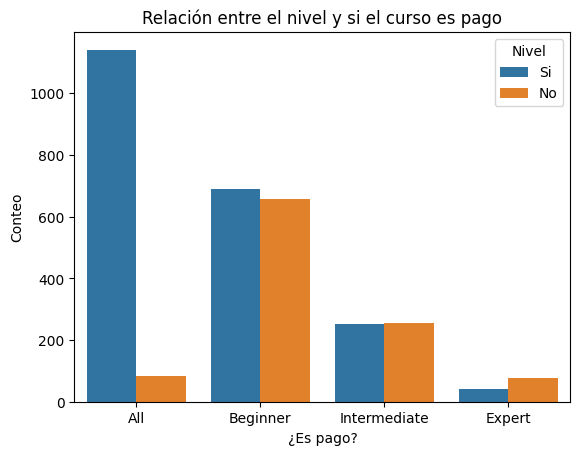

In [180]:
#Pago vs Nivel
sns.countplot(data=df, x="level", hue="is_paid", order= ["All", "Beginner", "Intermediate", "Expert"])
plt.xlabel('¿Es pago?')
plt.ylabel('Conteo')
plt.title('Relación entre el nivel y si el curso es pago')
plt.legend(title='Nivel')
plt.show()

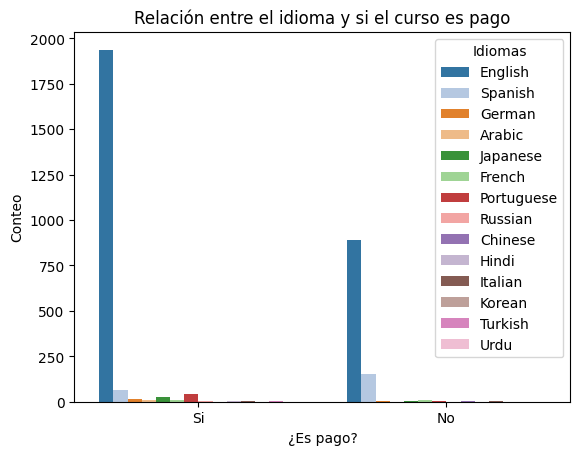

In [181]:
# pago vs idioma
sns.countplot(data=df, x="is_paid", hue="language", palette="tab20")
plt.xlabel('¿Es pago?')
plt.ylabel('Conteo')
plt.title('Relación entre el idioma y si el curso es pago')
plt.legend(title='Idiomas')
plt.show()

En el gráfico observamos que el idioma inglés predomina en la muestra de datos, lo cual nos lleva a realizar un análisis más detallado excluyendo este idioma. De esta forma, podremos comprender el comportamiento de los demás idiomas en relación a su condición de ser cursos pagos o gratuitos.

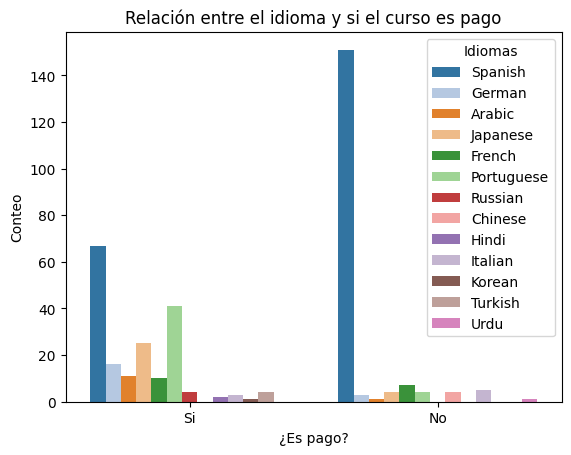

In [182]:
#Genero el filtro
df_filtered = df[df['language'] != 'English']

sns.countplot(data=df_filtered, x="is_paid", hue="language", palette="tab20")
plt.xlabel('¿Es pago?')
plt.ylabel('Conteo')
plt.title('Relación entre el idioma y si el curso es pago')
plt.legend(title='Idiomas')
plt.show()

Podemos ver que los cursos que se dictan en otros idiomas que no sean ingles o español son mayormente pagos

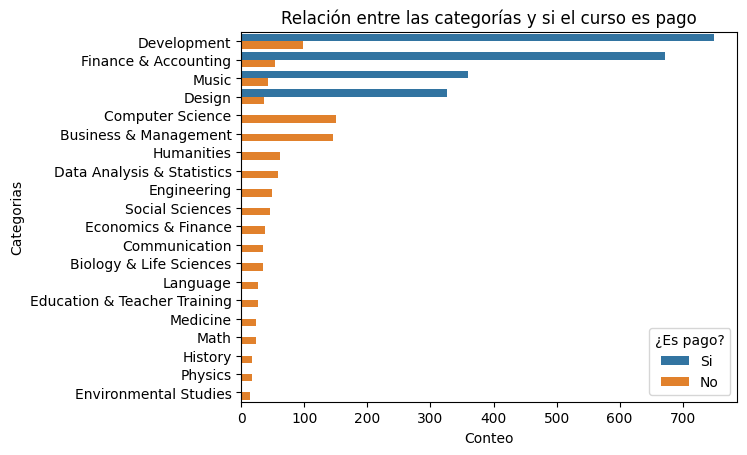

In [183]:
# Categorias vs Pago
frecuencias = df['category'].value_counts().head(20)
sns.countplot(y='category', data=df, order=frecuencias.index, hue="is_paid")
plt.xlabel("Conteo")
plt.ylabel('Categorias')
plt.title('Relación entre las categorías y si el curso es pago')
plt.legend(title='¿Es pago?')
plt.show()

Podemos observar que las categorías con mayor cantidad de cursos son predominantemente de pago, mientras que el resto de categorías ofrecen sus cursos de forma gratuita.

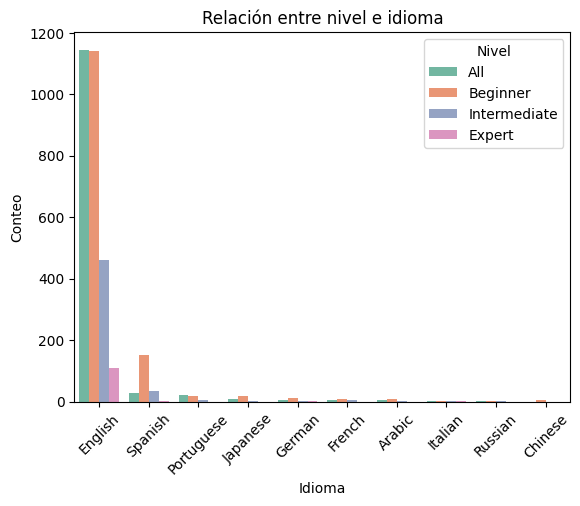

In [184]:
# nivel vs idioma
frecuencias = df['language'].value_counts().head(10)
sns.countplot(x='language', data=df, order=frecuencias.index, hue="level", hue_order= ["All", "Beginner", "Intermediate", "Expert"], palette="Set2")
plt.xlabel('Idioma')
plt.ylabel('Conteo')
plt.title('Relación entre nivel e idioma')
plt.legend(title='Nivel')
plt.xticks(rotation=45)
plt.show()

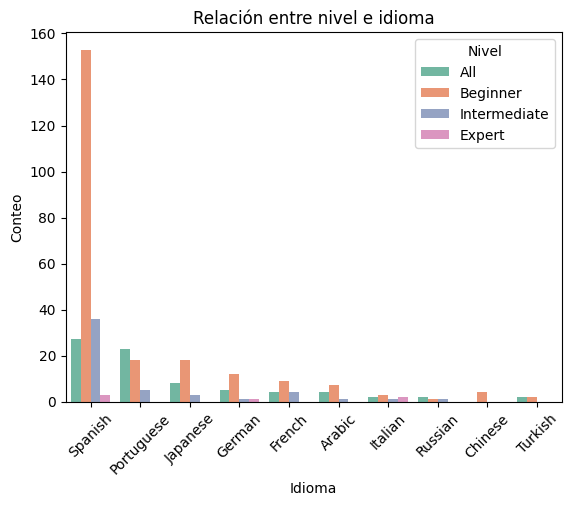

In [185]:
# nivel vs idioma (sin ingles)
sin_ingles = df[df["language"] != "English"]
frecuencias = sin_ingles['language'].value_counts().head(10)
sns.countplot(x='language', data=sin_ingles, order=frecuencias.index, hue="level", hue_order= ["All", "Beginner", "Intermediate", "Expert"], palette="Set2")
plt.xlabel('Idioma')
plt.ylabel('Conteo')
plt.title('Relación entre nivel e idioma')
plt.legend(title='Nivel')
plt.xticks(rotation=45)
plt.show()

Podemos observar que la gran mayoría de los cursos de nivel experto se imparten en inglés. Asimismo, los cursos que no están en inglés tienden a ser dirigidos a principiantes. Por lo tanto, se puede concluir que si se desea alcanzar un nivel experto en un determinado tema, es necesario tener conocimientos de inglés.

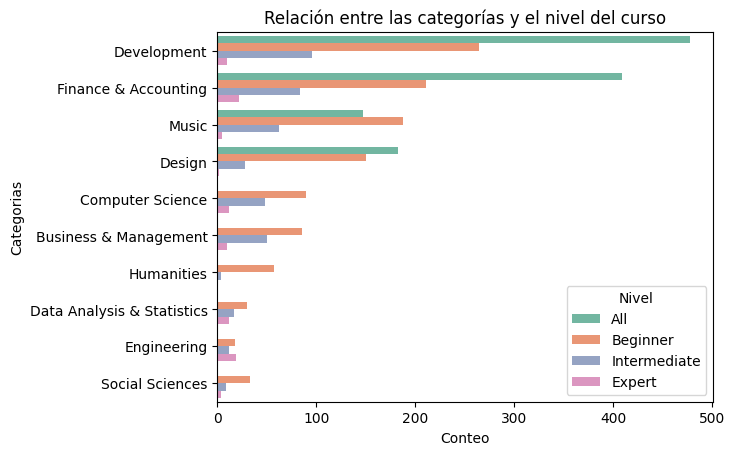

In [186]:
# categorias vs nivel
frecuencias = df['category'].value_counts().head(10)
sns.countplot(y='category', data=df, order=frecuencias.index, hue="level", hue_order= ["All", "Beginner", "Intermediate", "Expert"], palette="Set2")
plt.xlabel("Conteo")
plt.ylabel('Categorias')
plt.title('Relación entre las categorías y el nivel del curso')
plt.legend(title='Nivel')
plt.show()

El análisis de la relación entre las variables categóricas me conduce a investigar la relación existente entre la cantidad de estudiantes que optan por realizar cursos en idiomas distintos al inglés. Esto nos ayudará a comprender si existe un mercado potencial en esa área. <br><br>
Además, buscamos examinar la relación entre los niveles de los cursos y la cantidad de alumnos que los eligen, con el fin de determinar si la creación de una cantidad significativa de cursos para principiantes resulta beneficiosa. <br> <br>
También nos interesa explorar cómo se vincula esta información con los cursos pagos, con el propósito de evaluar si existe una estrategia en la cual los cursos para principiantes sean gratuitos y posteriormente los cursos de nivel intermedio o experto son pagos.<br>

Además, me lleva a investigar la relación existente entre la categoría de los cursos, el número de alumnos y su precio, a fin de determinar en qué temáticas resultaría más beneficioso generar una mayor cantidad de cursos.


## Distribución de variables numéricas

### Precio por curso (price)

Estos son los precios de los cursos que tenés que pagar para poder acceder al contenido

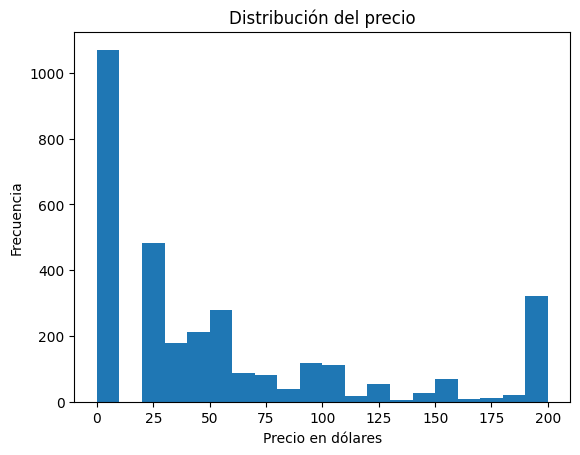

In [187]:
plt.hist(df['price'], bins=20)
plt.xlabel('Precio en dólares')
plt.ylabel('Frecuencia')
plt.title('Distribución del precio')
plt.show()

### Precio por certificación (price_Certificate)

Estos son los precios de los cursos que podés acceder al contenido gratis pero para poder accder a la certificación tenés que pagar

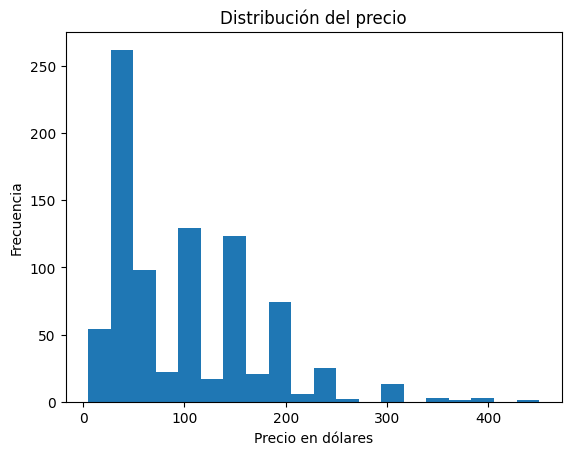

In [188]:
plt.hist(df['price_Certificate'], bins=20)
plt.xlabel('Precio en dólares')
plt.ylabel('Frecuencia')
plt.title('Distribución del precio')
plt.show()

Generé un grafico entre price y price_certificate para poder entender los precios en general

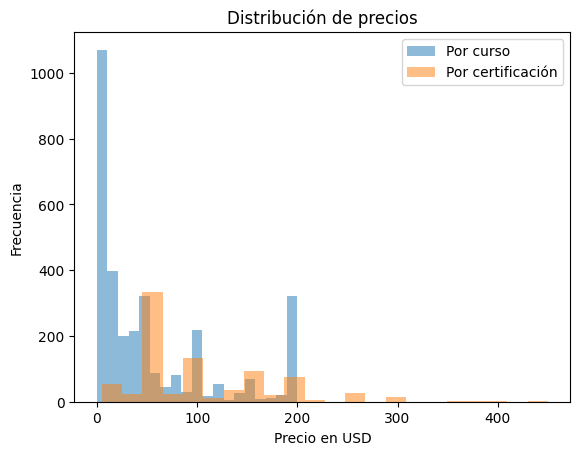

In [189]:
# Trazar histograma para precio por curso
plt.hist(df["price"], bins="auto", label='Por curso', alpha=0.5)
# Trazar histograma para precio por certificación
plt.hist(df["price_Certificate"], bins="auto", label='Por certificación', alpha=0.5)
plt.title('Distribución de precios')
plt.xlabel('Precio en USD')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Hemos observado que la mayoría de los cursos presentan precios inferiores a 100 USD, tanto en lo que respecta al costo del curso en sí como al pago de la certificación en aquellos cursos que la ofrecen. Además, hemos notado un pico en el valor de 200 USD.

### Número de alumnos por curso (num_subscribers)

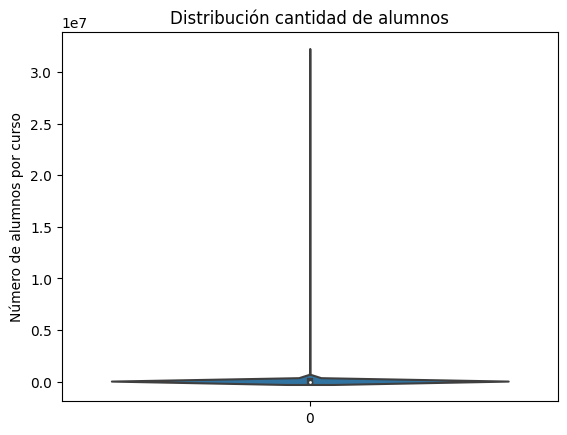

In [190]:
sns.violinplot(data=df["num_subscribers"])
plt.ylabel('Número de alumnos por curso')
plt.title('Distribución cantidad de alumnos')
plt.show()

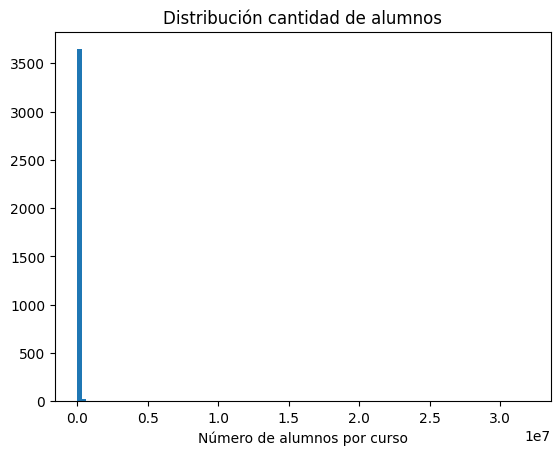

In [191]:
plt.hist(df["num_subscribers"], bins= 100 )
plt.xlabel('Número de alumnos por curso')
plt.title('Distribución cantidad de alumnos')
plt.show()

Las observaciones que se pueden deducir de estos gráficos se explican por la presencia de cursos con un número reducido pero frecuente de alumnos, mientras que los cursos con una gran cantidad de estudiantes presentan una frecuencia más baja. Prestaremos especial atención a los cursos con una gran cantidad de alumnos, a pesar de que su frecuencia de repetición sea menor.

### Rating por curso (rating)

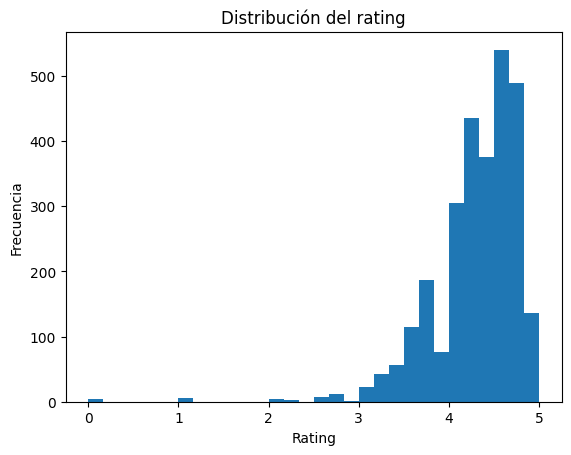

In [192]:
plt.hist(df["rating"], bins= 30)
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución del rating')
plt.show()

La gran mayoría de los cursos obtienen una calificación superior a 3.5 puntos. Entiendo que esto ocurre debido a que cuando un estudiante comienza un curso que no le agrada, lo abandona después de algunas clases, es decir, no logra completarlo y busca otro curso. Esto hace que solo se califiquen aquellos cursos que se completan, es decir, aquellos que son del agrado o interés de los alumnos.

### Duración del contenido (content_duration)

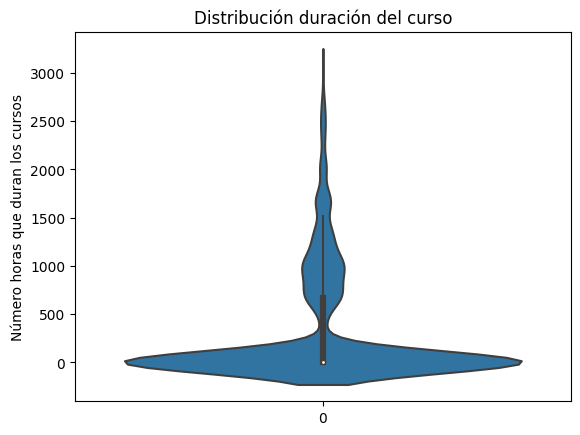

In [193]:
sns.violinplot(data=df["content_duration"])
plt.ylabel('Número horas que duran los cursos')
plt.title('Distribución duración del curso')
plt.show()

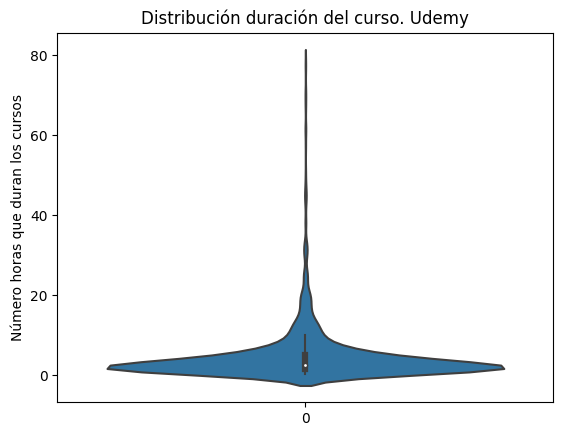

In [194]:
sns.violinplot(data=udemy["content_duration"])
plt.ylabel('Número horas que duran los cursos')
plt.title('Distribución duración del curso. Udemy')
plt.show()

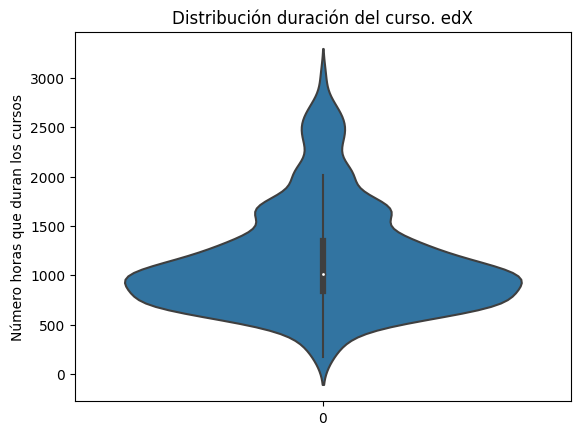

In [195]:
sns.violinplot(data=edx["content_duration"])
plt.ylabel('Número horas que duran los cursos')
plt.title('Distribución duración del curso. edX')
plt.show()

En este gráfico podemos observar dos categorías distintas de duración. Por un lado, encontramos cursos con duraciones inferiores a 80 horas, mientras que por otro lado, encontramos cursos que abarcan desde 500 hasta 3000 horas. Esta diferencia se debe a dos modalidades de trabajo diferentes: la primera corresponde a la plataforma Udemy, donde los cursos suelen tener una duración más corta, y la otra corresponde a la plataforma edX, donde los cursos se extienden a lo largo de semanas.

**A partir del análisis de la distribución de las variables numéricas**, me surge la necesidad de investigar la relación existente entre los precios de los cursos y la cantidad de alumnos que los eligen, con el objetivo de identificar posibles temáticas por las cuales los alumnos estén dispuestos a pagar un mayor precio. Asimismo, me resulta de interés indagar sobre qué categorías no reciben calificación, así como también los de mayor rating, con el propósito de tomarlo en consideración al momento proponer la generación de diferentes cursos.
Por último, investigaré si existe alguna relación entre la duración de los cursos y los alumnos inscriptos, con el propósito de determinar si la duración del curso tiene alguna influencia en la cantidad de estudiantes que lo eligen.

# Correlaciones

### Voy a probar un enfoque basado en cant de alumnos por curso, para intentar entender qué los hace consumir ciertos cursos

### Alumnos por categoría

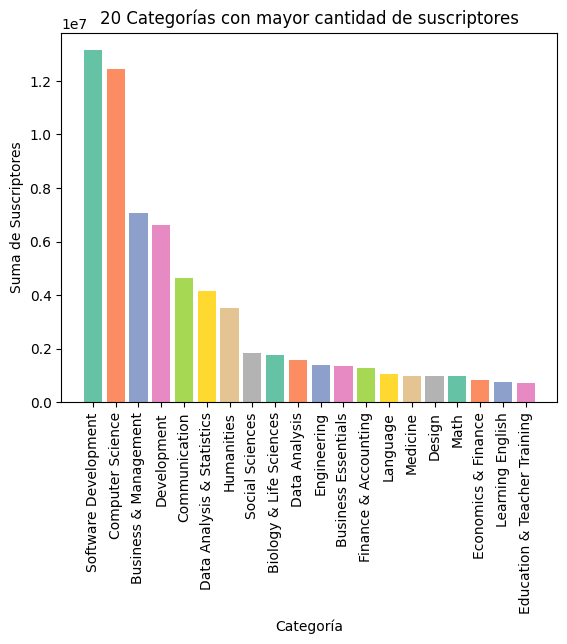

In [196]:
cant = df.groupby("category")["num_subscribers"].sum()
top_20 = cant.nlargest(20)
palette = sns.color_palette("Set2")

plt.bar(top_20.index, top_20, color= palette)
plt.xlabel("Categoría")
plt.ylabel("Suma de Suscriptores")
plt.title("20 Categorías con mayor cantidad de suscriptores")
plt.xticks(rotation=90)
plt.show()

In [197]:
cant[cant > 1000000].index

Index(['Biology & Life Sciences', 'Business & Management',
       'Business Essentials', 'Communication', 'Computer Science',
       'Data Analysis', 'Data Analysis & Statistics', 'Development',
       'Engineering', 'Finance & Accounting', 'Humanities', 'Language',
       'Social Sciences', 'Software Development'],
      dtype='object', name='category')

Las categorías con más de 1 millón de alumnos son las siguientes: "Biology & Life Sciences", "Business & Management", "Business Essentials", "Communication", "Computer Science", "Data Analysis", "Data Analysis & Statistics", "Development", "Engineering", "Finance & Accounting", "Humanities", "Language", "Social Sciences" y "Software Development".

### Alumnos por nivel del curso

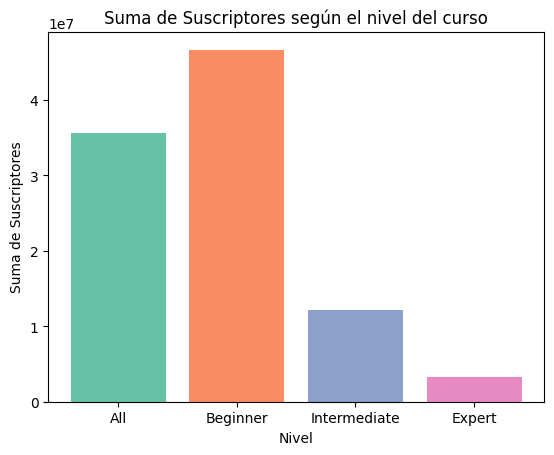

In [198]:
cant = df.groupby("level")["num_subscribers"].sum()
palette = sns.color_palette("Set2")
order = ["All", "Beginner", "Intermediate", "Expert"]

cant_sorted = cant.reindex(order)

plt.bar(cant_sorted.index, cant_sorted, color=palette)
plt.xlabel("Nivel")
plt.ylabel("Suma de Suscriptores")
plt.title("Suma de Suscriptores según el nivel del curso")
plt.show()

La mayoría de los alumnos realizan cursos de nivel inicial y para todos los niveles

### Alumnos por si es pago

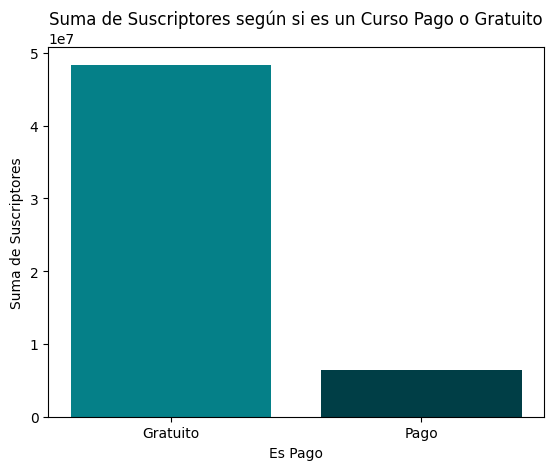

In [199]:
cant = df.groupby("is_paid")["num_subscribers"].sum()

plt.bar(cant.index, cant, color=["#058088", "#003e46"] )
plt.xlabel("Es Pago")
plt.ylabel("Suma de Suscriptores")
plt.title("Suma de Suscriptores según si es un Curso Pago o Gratuito")
plt.xticks(cant.index,  ["Gratuito", "Pago"] )
plt.show()

In [200]:
df[(df["is_paid"] == "No") & (df["add_certificate"] == "No")]

,Id,course_title,is_paid,price,num_subscribers,level,content_duration,rating,language,category,anio_publicacion,ingreso_por_curso,plataforma,add_certificate,price_Certificate


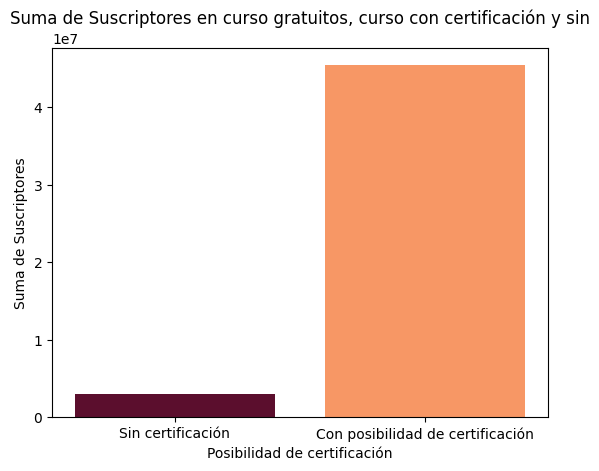

In [201]:
#ver cuantos alumnos de los cursos gatuitos son cursos que tienen la posibilidad de añadir un certificado
#Para esto completo los valores de la columna add_certificate de la plataforma Udemy ya que solo tiene cursos pagos o gratuitos
df.loc[df["plataforma"] == "Udemy", "add_certificate"] = "No"
gratis = df[df["is_paid"] == "No"]
cant = gratis.groupby("add_certificate")["num_subscribers"].sum()

plt.bar(cant.index, cant, color=["#5B0E2D", "#F79765"] )
plt.xlabel("Posibilidad de certificación")
plt.ylabel("Suma de Suscriptores")
plt.title("Suma de Suscriptores en curso gratuitos, curso con certificación y sin")
plt.xticks(cant.index,  ["Sin certificación", "Con posibilidad de certificación"] )
plt.show()

Aunque en la distribución de la variable numérica se evidencia una mayor presencia de cursos pagos en comparación con los gratuitos, es importante destacar que la mayoría de los alumnos opta por realizar cursos gratuitos.

He realizado un segundo gráfico que muestra la cantidad de alumnos que realizan cursos gratuitos pero tienen la opción de obtener un certificado pago. En dicho gráfico se observa que la gran mayoría de los alumnos que optan por cursos gratuitos también tienen la posibilidad de adquirir certificados pagos.

### Alumnos por precio

In [202]:
precios = df[df["is_paid"] == "Si"].groupby(["price"])["num_subscribers"].sum()

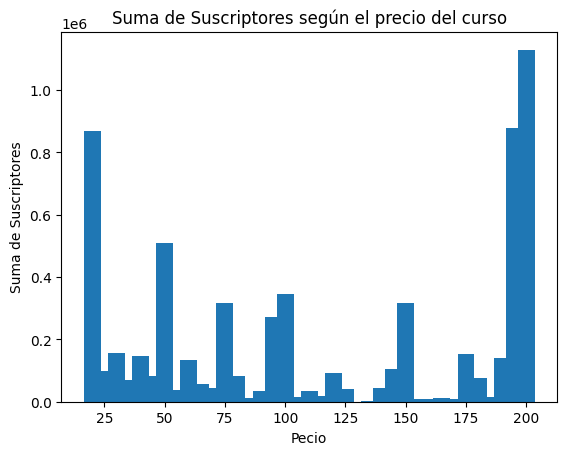

In [203]:
plt.bar(precios.index, precios, width=7)
plt.xlabel("Pecio")
plt.ylabel("Suma de Suscriptores")
plt.title("Suma de Suscriptores según el precio del curso")
plt.show()

Se observa un pico notable en los montos que los alumnos pagan por curso. La mayoría de los cursos pagos tienen un valor de 200 USD, seguido de otro pico significativo en 20 USD.

#### Realizo un grafico para ver a qué categoria pertenecen los más pagos y los menos pagos

In [204]:
categoria_200 =df[df["price"] == 200].groupby(["category"])["num_subscribers"].sum()

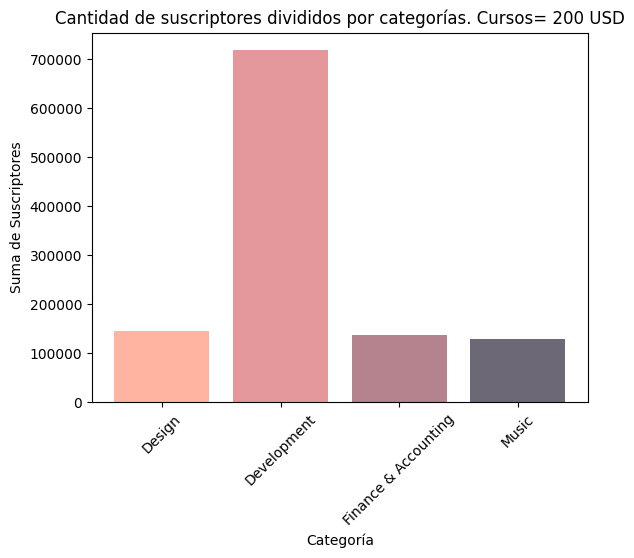

In [205]:
plt.bar(categoria_200.index, categoria_200, color=["#FFB4A2", "#E5989B", "#B5838D", "#6D6875"])
plt.xlabel("Categoría")
plt.ylabel("Suma de Suscriptores")
plt.title("Cantidad de suscriptores divididos por categorías. Cursos= 200 USD")
plt.xticks(rotation=45)
plt.show()

In [206]:
categoria_20 = df[df["price"] == 20].groupby(["category"])["num_subscribers"].sum()

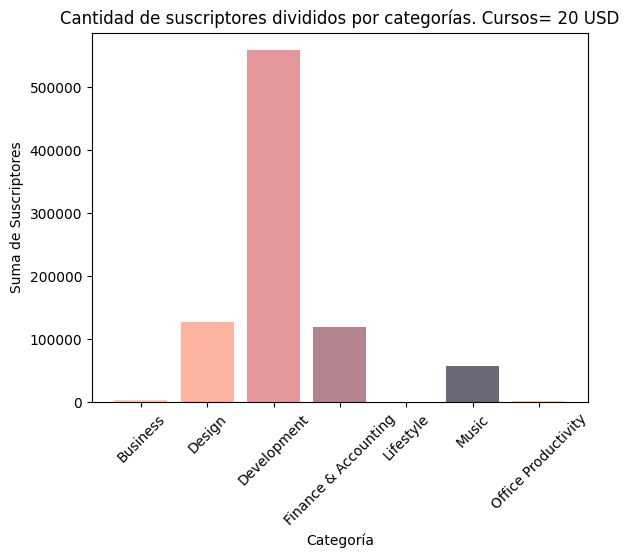

In [207]:
plt.bar(categoria_20.index, categoria_20, color=["#FFCDB2", "#FFB4A2", "#E5989B", "#B5838D", "#800F2F", "#6D6875"])
plt.xlabel("Categoría")
plt.ylabel("Suma de Suscriptores")
plt.title("Cantidad de suscriptores divididos por categorías. Cursos= 20 USD")
plt.xticks(rotation=45)
plt.show()

Es interesante notar que la mayoría de las personas que eligen pagar por cursos con un precio de 200 USD se orientan hacia temáticas relacionadas con el desarrollo (development). Además, resulta llamativo que las categorías de los cursos más económicos pero más populares sean las mismas que las de los cursos más costosos. A pesar de esto, la temática de desarrollo continúa siendo la que genera mayores ingresos. Generandose un top 4 en ambas de desarrollo, diseño, finanzas y música

### Alumnos por precio de certificado

In [208]:
precios = df[df["add_certificate"] == "Si"].groupby(["price_Certificate"])["num_subscribers"].sum()

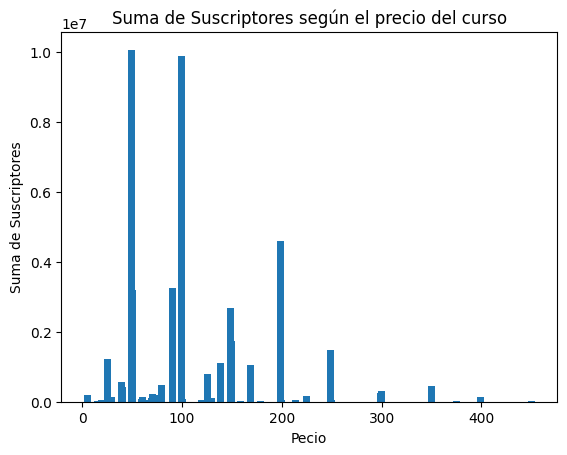

In [209]:
plt.bar(precios.index, precios, width=7)
plt.xlabel("Pecio")
plt.ylabel("Suma de Suscriptores")
plt.title("Suma de Suscriptores según el precio del curso")
plt.show()

In [210]:
top_5_altos = precios.nlargest(5)
indices_top_5_altos = top_5_altos.index

print("Los 5 valores más altos:")
print(top_5_altos)
print("Los 5 valores más altos:")
print(indices_top_5_altos)

Los 5 valores más altos:
price_Certificate
49.0     10063575.0
99.0      9883629.0
199.0     4596439.0
90.0      3264459.0
50.0      3192084.0
Name: num_subscribers, dtype: float64
Los 5 valores más altos:
Float64Index([49.0, 99.0, 199.0, 90.0, 50.0], dtype='float64', name='price_Certificate')


Es interesante observar que los precios más comunes por los que la mayoría de las personas pagaron por el certificado de sus cursos fueron 49.0, 99.0, 199.0, 90.0 y 50.0. Para obtener una mejor comprensión de si existe alguna relación entre estos precios y las categorías de los cursos, realizaré un análisis agrupando los datos por categorías.

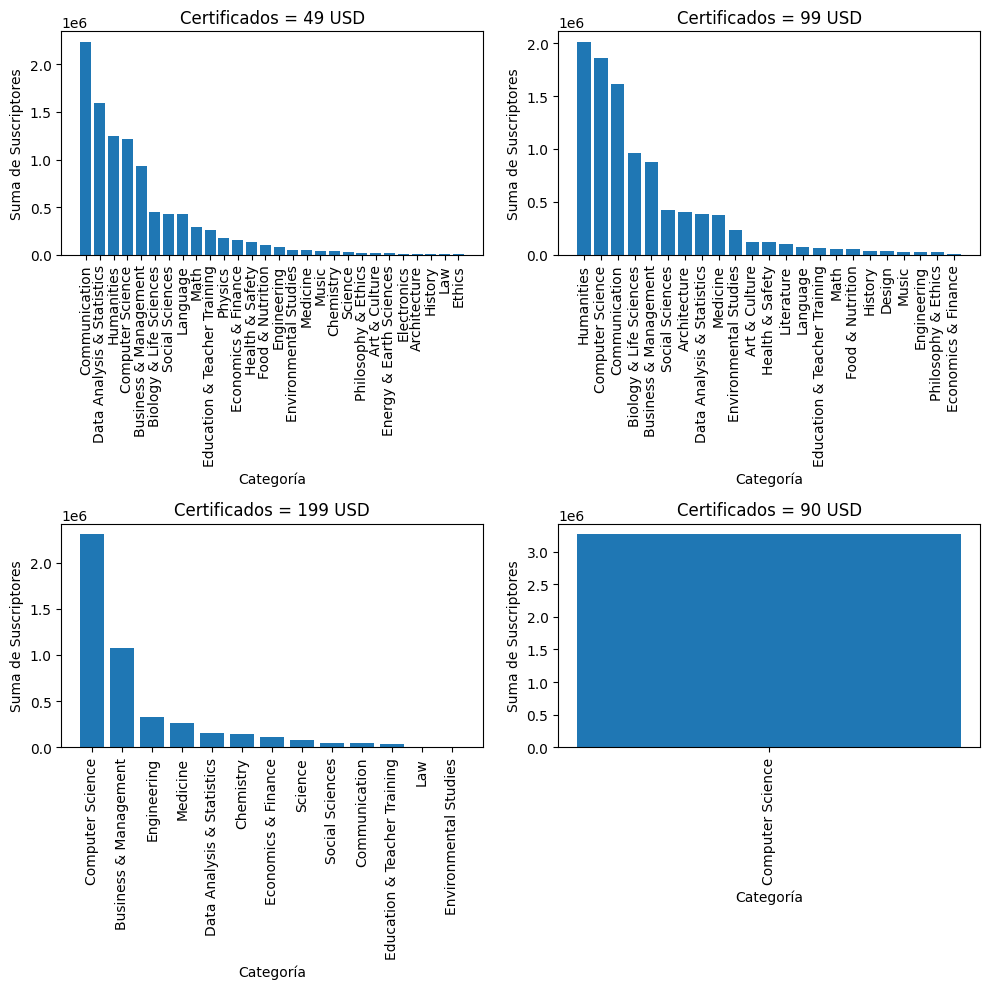

In [211]:
# Crear una cuadrícula de subplots con 2 filas y 2 columnas
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
#Genero los dataset
categoria_49 =df[df["price_Certificate"]== 49.0].groupby(["category"])["num_subscribers"].sum()
categoria_49 = categoria_49.sort_values(ascending=False)
categoria_99 =df[df["price_Certificate"]== 99.0].groupby(["category"])["num_subscribers"].sum()
categoria_99 = categoria_99.sort_values(ascending=False)
categoria_199 =df[df["price_Certificate"]== 199.0].groupby(["category"])["num_subscribers"].sum()
categoria_199 = categoria_199.sort_values(ascending=False)
categoria_90 =df[df["price_Certificate"]== 90.0].groupby(["category"])["num_subscribers"].sum()
categoria_90 = categoria_90.sort_values(ascending=False)

axs[0, 0].bar(categoria_49.index, categoria_49)
axs[0, 0].set_xlabel("Categoría")
axs[0, 0].set_ylabel("Suma de Suscriptores")
axs[0, 0].set_title("Certificados = 49 USD")
axs[0, 0].tick_params(axis='x', rotation=90)

axs[0, 1].bar(categoria_99.index, categoria_99)
axs[0, 1].set_xlabel("Categoría")
axs[0, 1].set_ylabel("Suma de Suscriptores")
axs[0, 1].set_title("Certificados = 99 USD")
axs[0, 1].tick_params(axis='x', rotation=90)

axs[1, 0].bar(categoria_199.index, categoria_199)
axs[1, 0].set_xlabel("Categoría")
axs[1, 0].set_ylabel("Suma de Suscriptores")
axs[1, 0].set_title("Certificados = 199 USD")
axs[1, 0].tick_params(axis='x', rotation=90)

axs[1, 1].bar(categoria_90.index, categoria_90)
axs[1, 1].set_xlabel("Categoría")
axs[1, 1].set_ylabel("Suma de Suscriptores")
axs[1, 1].set_title("Certificados = 90 USD")
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [212]:
print(f"Categorías con certificado = 49 USD y mayor de quinientos mil alumnos: {categoria_49.nlargest(5)}, \n"
      f"Categorías con certificado = 99 USD y mayor de quinientos mil alumnos: {categoria_99.nlargest(5)}, \n"
      f"Categorías con  certificado = 199 USD y mayor de quinientos mil alumnos: {categoria_199.nlargest(2)}, \n"
      f"Categoría con certificado = 90 USD y mayor de quinientos mil alumnos: {categoria_90.nlargest(1)}")
       

Categorías con certificado = 49 USD y mayor de quinientos mil alumnos: category
Communication                 2235317.0
Data Analysis & Statistics    1598983.0
Humanities                    1243021.0
Computer Science              1216940.0
Business & Management          932597.0
Name: num_subscribers, dtype: float64, 
Categorías con certificado = 99 USD y mayor de quinientos mil alumnos: category
Humanities                 2011815.0
Computer Science           1856674.0
Communication              1616251.0
Biology & Life Sciences     958784.0
Business & Management       875093.0
Name: num_subscribers, dtype: float64, 
Categorías con  certificado = 199 USD y mayor de quinientos mil alumnos: category
Computer Science         2304090.0
Business & Management    1079400.0
Name: num_subscribers, dtype: float64, 
Categoría con certificado = 90 USD y mayor de quinientos mil alumnos: category
Computer Science    3264459.0
Name: num_subscribers, dtype: float64


Las temáticas con mayor número de estudiantes que pagan entre 49 y 200 USD por sus cursos son Computer Science, Business & Management, Humanities, Communication, Biology & Life Sciences, y Data Analysis & Statistics.

### Alumnos por idioma 


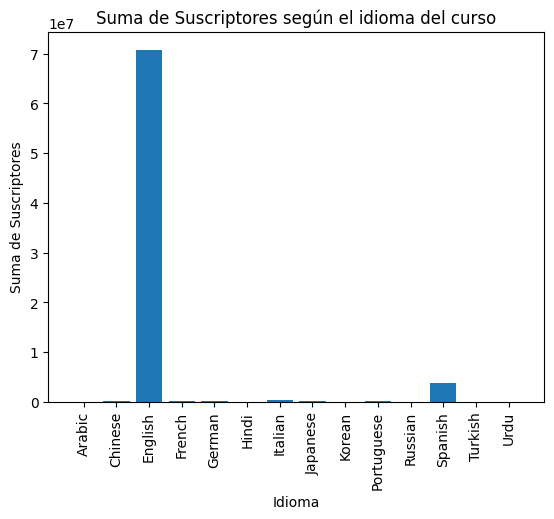

In [213]:
cant = df.groupby("language")["num_subscribers"].sum()

plt.bar(cant.index, cant)
plt.xlabel("Idioma")
plt.ylabel("Suma de Suscriptores")
plt.title("Suma de Suscriptores según el idioma del curso")
plt.xticks(rotation=90)
plt.show()

Miramos cuantos de esos son pagos y cuantos gratuitos

In [214]:
df.groupby(["language", "is_paid"])["num_subscribers"].sum().unstack()

is_paid,No,Si
language,,
Arabic,1477.0,3120.0
Chinese,56663.0,NaN
English,44026056.0,6305461.0
French,162077.0,400.0
German,11785.0,11059.0
Hindi,NaN,13.0
Italian,283032.0,142.0
Japanese,63621.0,15338.0
Korean,NaN,44.0


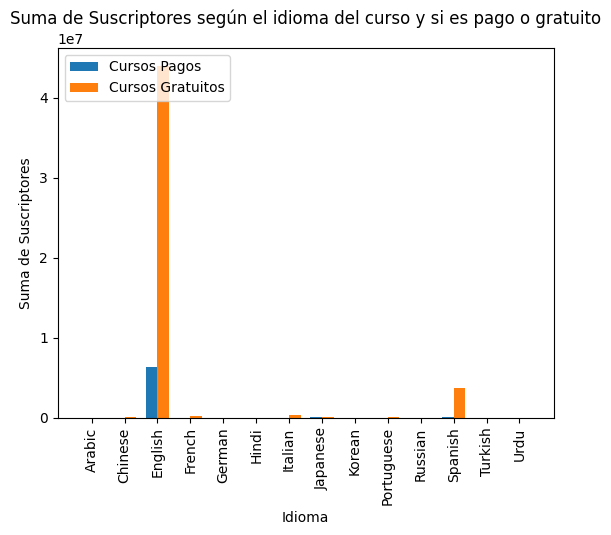

In [215]:
# Combinar los datos de cursos pagos y gratuitos
cant = df.groupby(["language", "is_paid"])["num_subscribers"].sum().unstack()

# Configuración de las barras
bar_width = 0.35
index = np.arange(len(cant.index))

# Crear las barras para los cursos pagos
plt.bar(index, cant["Si"], bar_width, label='Cursos Pagos')

# Crear las barras para los cursos gratuitos
plt.bar(index + bar_width, cant["No"], bar_width, label='Cursos Gratuitos')

plt.xlabel('Idioma')
plt.ylabel('Suma de Suscriptores')
plt.title('Suma de Suscriptores según el idioma del curso y si es pago o gratuito')
plt.xticks(index + bar_width / 2, cant.index, rotation=90)
plt.legend()
plt.show()

La mayoría de los estudiantes optan por cursos en inglés y gratuitos. Sin embargo, cantidades similares de alumnos eligen cursos pagos en inglés y cursos gratuitos en español.<br>
Creo una máscara dejando fuera el ingles y el español para entender que otros idiomas tienen mayor cantidad de alumnos

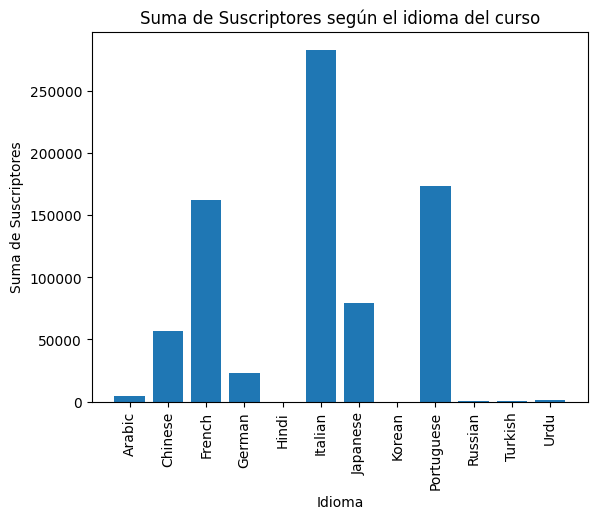

In [216]:
sin_ingles = df[(df["language"] != "English") & (df["language"] != "Spanish")]
cant = sin_ingles.groupby("language")["num_subscribers"].sum()

plt.bar(cant.index, cant)
plt.xlabel("Idioma")
plt.ylabel("Suma de Suscriptores")
plt.title("Suma de Suscriptores según el idioma del curso")
plt.xticks(rotation=90)
plt.show()

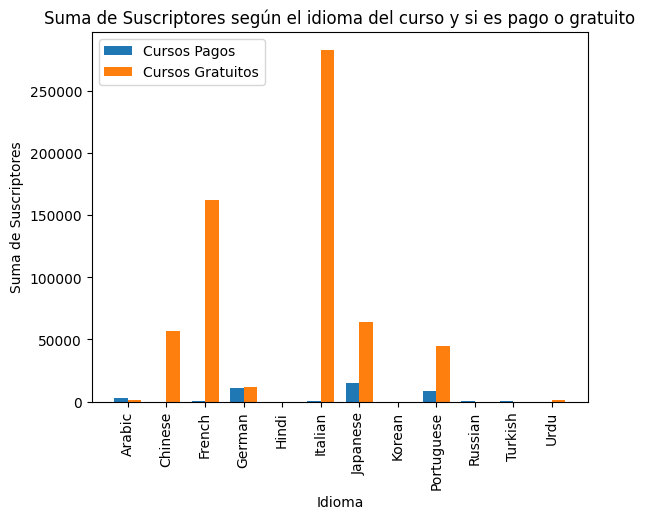

In [217]:
# Combinar los datos de cursos pagos y gratuitos
cant = sin_ingles.groupby(["language", "is_paid"])["num_subscribers"].sum().unstack()

# Configuración de las barras
bar_width = 0.35
index = np.arange(len(cant.index))

# Crear las barras para los cursos pagos
plt.bar(index, cant["Si"], bar_width, label='Cursos Pagos')

# Crear las barras para los cursos gratuitos
plt.bar(index + bar_width, cant["No"], bar_width, label='Cursos Gratuitos')

plt.xlabel('Idioma')
plt.ylabel('Suma de Suscriptores')
plt.title('Suma de Suscriptores según el idioma del curso y si es pago o gratuito')
plt.xticks(index + bar_width / 2, cant.index, rotation=90)
plt.legend()
plt.show()

Podemos observar que los cursos con una cantidad significativa de alumnos (por encima de 50.000) son mayormente gratuitos y se imparten en idiomas como Italiano, Francés, Japonés, Chino y Portugués. Esto demuestra el interés de los alumnos por cursos en esos idiomas específicos.

In [218]:
#df.groupby(['is_paid',"category", "level"])['num_subscribers'].sum()

In [219]:
df["add_certificate"].unique()

array(['No', 'Si', nan], dtype=object)

In [221]:
df[(df["add_certificate"] == "No") & df["is_paid"] == "No"]

,Id,course_title,is_paid,price,num_subscribers,level,content_duration,rating,language,category,anio_publicacion,ingreso_por_curso,plataforma,add_certificate,price_Certificate
